In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import keras
keras.__version__

'2.4.3'

In [2]:
from keras.datasets import mnist
from keras.utils import to_categorical

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!unzip "/content/drive/MyDrive/Colab Notebooks/test.zip" -d "/content"
!unzip "/content/drive/MyDrive/Colab Notebooks/train.zip" -d "/content"

Archive:  /content/drive/MyDrive/Colab Notebooks/test.zip
   creating: /content/test/
  inflating: /content/__MACOSX/._test  
  inflating: /content/test/.DS_Store  
  inflating: /content/__MACOSX/test/._.DS_Store  
   creating: /content/test/G/
  inflating: /content/__MACOSX/test/._G  
   creating: /content/test/A/
  inflating: /content/__MACOSX/test/._A  
   creating: /content/test/D/
  inflating: /content/__MACOSX/test/._D  
   creating: /content/test/E/
  inflating: /content/__MACOSX/test/._E  
   creating: /content/test/B/
  inflating: /content/__MACOSX/test/._B  
  inflating: /content/test/G/img_5x29.jpg  
  inflating: /content/__MACOSX/test/G/._img_5x29.jpg  
  inflating: /content/test/G/img_5x15.jpg  
  inflating: /content/__MACOSX/test/G/._img_5x15.jpg  
  inflating: /content/test/G/img_4x6.jpg  
  inflating: /content/__MACOSX/test/G/._img_4x6.jpg  
  inflating: /content/test/G/img_4x41.jpg  
  inflating: /content/__MACOSX/test/G/._img_4x41.jpg  
  inflating: /content/test/G/im

In [7]:
image_size = (32,32)
batch_size = 32
train_flow_path = '/content/train' 
test_flow_path = '/content/test'

In [8]:
data_gen_train = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

data_gen_test = keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
)

train_images = data_gen_train.flow_from_directory(
    train_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A', 'B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

test_images = data_gen_test.flow_from_directory(
    test_flow_path,
    target_size = image_size,
    batch_size = batch_size,
    color_mode = 'rgb',
    classes = ['A','B', 'D', 'E', 'G'],
    class_mode = 'categorical',
    shuffle = True,
    seed = 42
)

Found 1000 images belonging to 5 classes.
Found 500 images belonging to 5 classes.


In [9]:
from keras.models import Sequential
from keras.layers import Dense, Dropout,Flatten

In [10]:
model = Sequential()
model.add(Flatten(input_shape=[32,32,3]))
model.add(Dense(5, activation='softmax'))
model.compile(optimizer='adam',
                loss='categorical_crossentropy',
                metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 5)                 15365     
Total params: 15,365
Trainable params: 15,365
Non-trainable params: 0
_________________________________________________________________


In [11]:
history = model.fit(train_images, epochs=50, validation_data = test_images)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
32/32 [==============================] - 1s 30ms/step - loss: 709.4390 - accuracy: 0.1966 - val_loss: 204.1916 - val_accuracy: 0.1820
Epoch 2/50
32/32 [==============================] - 1s 17ms/step - loss: 158.1338 - accuracy: 0.2550 - val_loss: 124.7408 - val_accuracy: 0.2080
Epoch 3/50
32/32 [==============================] - 1s 17ms/step - loss: 96.2351 - accuracy: 0.2990 - val_loss: 150.1992 - val_accuracy: 0.2300
Epoch 4/50
32/32 [==============================] - 1s 17ms/step - loss: 88.5711 - accuracy: 0.2788 - val_loss: 162.7769 - val_accuracy: 0.2120
Epoch 5/50
32/32 [==============================] - 1s 17ms/step - loss: 137.0144 - accuracy: 0.2971 - val_loss: 238.9143 - val_accuracy: 0.2520
Epoch 6/50
32/32 [==============================] - 1s 16ms/step - loss: 164.9879 - accuracy: 0.3032 - val_loss: 84.3974 - val_accuracy: 0.2660
Epoch 7/50
32/32 [==============================] - 1s 17ms/step - loss: 50.3315 - accuracy: 0.4210 - val_loss: 72.5684 - val_accurac

In [12]:
scores = model.evaluate(test_images)
print(f'* Loss = {scores[0]}\n* Accuracy = {scores[1]}')

11/16 [===================>..........] - ETA: 0s - loss: 129.0037 - accuracy: 0.3892

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:728: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


16/16 [==============================] - 0s 11ms/step - loss: 133.4703 - accuracy: 0.3780
* Loss = 133.47027587890625
* Accuracy = 0.3779999911785126


In [13]:
from keras.utils.vis_utils import plot_model

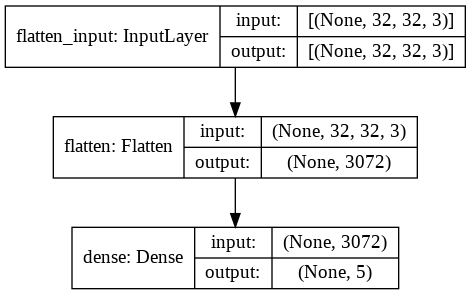

In [14]:
plot_model(model, to_file='./One_layer_model.png', show_shapes=True, show_layer_names=True)

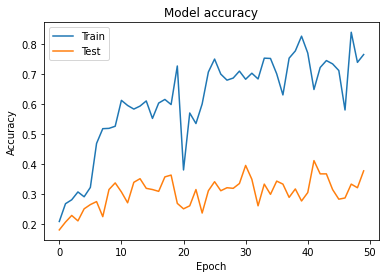

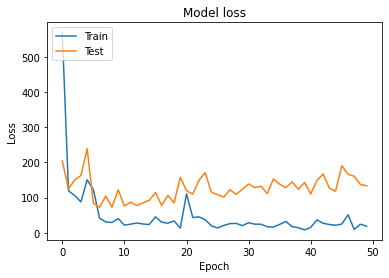

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./One_layer_accurasy.png')
plt.show()
#
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.savefig('./One_layer_loss.png')
plt.show()